In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
import keras
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from keras.utils import to_categorical
from keras.backend import clear_session
from keras.layers import Dense
from keras.preprocessing.text import one_hot
import os


In [2]:
### GET / FORMAT TARGET DATA ##########################################

# small set = 1000features / large set = 500features
posts_smallSet = np.array(pd.read_csv('vectorized_posts3', header=None))
posts_largeSet = np.array(pd.read_csv('vectorizedPosts_largeSet', header=None))

# get targets
df = pd.read_csv('mbti_1.csv', names=['type', 'posts'])
targets = np.array(df['type'].values[1:])

# convert classes to integer - 16 classes
targets[targets == 'ENFJ'] = 0
targets[targets == 'ENFP'] = 1
targets[targets == 'ENTJ'] = 2
targets[targets == 'ENTP'] = 3
targets[targets == 'ESFJ'] = 4
targets[targets == 'ESFP'] = 5
targets[targets == 'ESTJ'] = 6
targets[targets == 'ESTP'] = 7
targets[targets == 'INFJ'] = 8
targets[targets == 'INFP'] = 9
targets[targets == 'INTJ'] = 10
targets[targets == 'INTP'] = 11
targets[targets == 'ISFJ'] = 12
targets[targets == 'ISFP'] = 13
targets[targets == 'ISTJ'] = 14
targets[targets == 'ISTP'] = 15

print("Small Set: ",np.shape(posts_smallSet))
print("Large Set: ",np.shape(posts_largeSet))

Small Set:  (8675, 500)
Large Set:  (8675, 1000)


In [10]:
### FUNCTIONS ##########################################


def visualize(epochs, history):
    
    #Visualize epoch V J
    epoch=np.linspace(1,epochs,num=epochs)

    print("epoch vs J ->")
    fig, axes = plt.subplots()
    axes.plot(epoch, history)
    axes.set_xlabel('epoch')
    axes.set_ylabel('J')
    plt.show()
    
def format_split_data(file, targets):
    
    #split into train/test - 70/30% - shuffles data prior to split
    train, test, y_train, y_test = train_test_split(file, targets, train_size=0.7, test_size=0.3, random_state=1000)
    print("Train x / y: ", train.shape, y_train.shape)
    print("Test x / y: ", test.shape, y_test.shape)

    #convert to one-hot target encoding
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    
    return train, test, y_train, y_test

def build_model(size):
    
    inputs = keras.Input(shape=(size,)) #num features
    x = tf.keras.layers.Dense(4, activation=tf.nn.relu)(inputs)
    outputs = tf.keras.layers.Dense(16, activation=tf.nn.softmax)(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs) #create model
    model.compile(optimizer="sgd", loss=tf.keras.losses.CategoricalCrossentropy())
    model.summary()
    
    return model

def fit_model(x, y, e):

    history = model.fit(train, y_train, epochs=e, verbose=0)
    h = np.array(history.history['loss']) # history of loss @ ea epoch -> np array
    
    visualize(e, h) #chart J v epoch
    
    return h

def predict(test, y):
    #Generate class predictions & accuracy for the input samples
    yhat = model.predict(test, verbose=1)
    m = tf.keras.metrics.CategoricalAccuracy()
    m.update_state(y, yhat, sample_weight=None)
    
    return m.result().numpy()
    

Train x / y:  (6072, 500) (6072,)
Test x / y:  (2603, 500) (2603,)
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 2004      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                80        
Total params: 2,084
Trainable params: 2,084
Non-trainable params: 0
_________________________________________________________________
epoch vs J ->


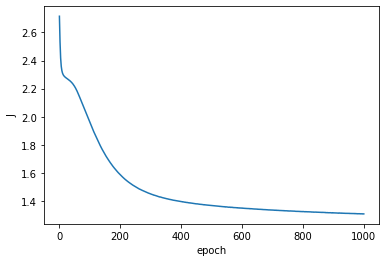

82/82 [==============================] - 0s 399us/step
Accuracy 56.90%: epochs 1000 - features 500


In [7]:
### SMALL SET - 500 FEATURES - 1000 EPOCHS ##########################################
epochs = 1000

 
train, test, y_train, y_test = format_split_data(posts_smallSet, targets)
model = build_model(train.shape[1])
h = fit_model(train, y_train, epochs)
result = predict(test, y_test)

print("Accuracy {:.2%}: epochs {} - features {}".format(result, epochs, train.shape[1]))
clear_session() 

Train x / y:  (6072, 500) (6072,)
Test x / y:  (2603, 500) (2603,)
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
dense (Dense)                (None, 4)                 2004      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                80        
Total params: 2,084
Trainable params: 2,084
Non-trainable params: 0
_________________________________________________________________
epoch vs J ->


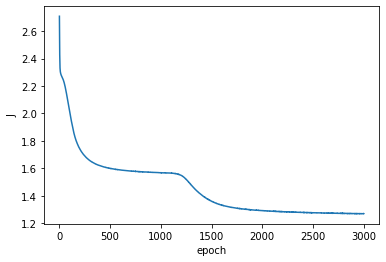

82/82 [==============================] - 0s 501us/step
Accuracy 56.55%: epochs 3000 - features 500


In [8]:
### SMALL SET - 500 FEATURES - 3000 EPOCHS ##########################################
epochs = 3000

train, test, y_train, y_test = format_split_data(posts_smallSet, targets)
model = build_model(train.shape[1])
h = fit_model(train, y_train, epochs)
result = predict(test, y_test)

print("Accuracy {:.2%}: epochs {} - features {}".format(result, epochs, train.shape[1]))
clear_session() 

Train x / y:  (6072, 1000) (6072,)
Test x / y:  (2603, 1000) (2603,)
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1000)]            0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 4004      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                80        
Total params: 4,084
Trainable params: 4,084
Non-trainable params: 0
_________________________________________________________________
epoch vs J ->


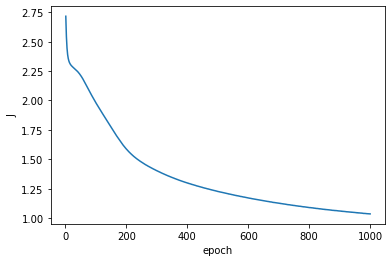

82/82 [==============================] - 0s 499us/step
Accuracy 59.85%: epochs 1000 - features 1000


In [11]:
### LARGE SET - 1000 FEATURES - 1000 EPOCHS ##########################################
epochs = 1000

train, test, y_train, y_test = format_split_data(posts_largeSet, targets)
model = build_model(train.shape[1])
h = fit_model(train, y_train, epochs)
result = predict(test, y_test)

print("Accuracy {:.2%}: epochs {} - features {}".format(result, epochs, train.shape[1]))
clear_session() 

In [ ]:
### LARGE SET - 1000 FEATURES - 3000 EPOCHS ##########################################
epochs = 3000

train, test, y_train, y_test = format_split_data(posts_largeSet, targets)
model = build_model(train.shape[1])
h = fit_model(train, y_train, epochs)
result = predict(test, y_test)

print("Accuracy {:.2%}: epochs {} - features {}".format(result, epochs, train.shape[1]))
clear_session() 

Train x / y:  (6072, 1000) (6072,)
Test x / y:  (2603, 1000) (2603,)
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1000)]            0         
_________________________________________________________________
dense (Dense)                (None, 4)                 4004      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                80        
Total params: 4,084
Trainable params: 4,084
Non-trainable params: 0
_________________________________________________________________
